In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')  # Replace '/path/to/EVO_BASE' with the actual path to the module
from EVO_BASE import LogisticRegression, EvolutionOptimizer
from multiParent import mpEvolutionOptimizer
import torch
import numpy as np
import time
import random
import matplotlib.pyplot as plt

### Exploring the Optimal Number of Parents for gene Inheritance

In [2]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

In [3]:
def accuracy(model, X, y):
    y_pred = model.predict(X)
    return (y_pred == y).float().mean().item()

Time taken:  61.25140357017517


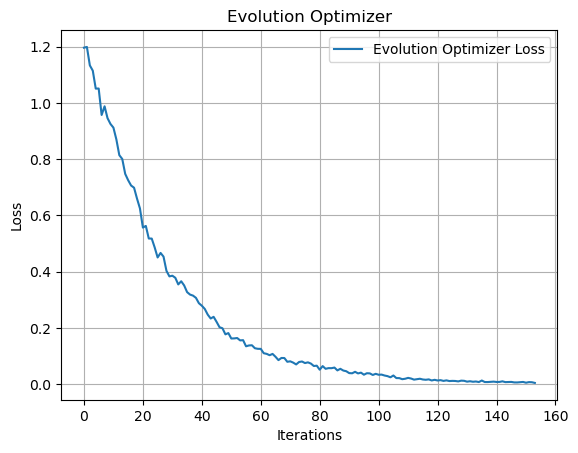

In [4]:
X, y = classification_data(p_dims=200, noise=0.8, n_points=1000)
LR = LogisticRegression()
opt = mpEvolutionOptimizer(LR)
opt.set_mutation(0.5)
opt.set_population_size(100)
losses = []
start = time.time()
while accuracy(LR, X, y) < 1:
    opt.step(X, y, num_parents=3)
    losses.append(LR.loss(X, y).item())
print("Time taken: ", time.time() - start)
plt.plot(losses, label="Evolution Optimizer Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer")
plt.legend()
plt.grid(True)
plt.show()

Running for num_parents = 1
  Finished in 298 iterations, Time: 116.95s
Running for num_parents = 2
  Finished in 142 iterations, Time: 61.89s
Running for num_parents = 3
  Finished in 134 iterations, Time: 61.24s
Running for num_parents = 4
  Finished in 151 iterations, Time: 62.29s
Running for num_parents = 5
  Finished in 132 iterations, Time: 59.84s
Running for num_parents = 6
  Finished in 134 iterations, Time: 54.17s
Running for num_parents = 7
  Finished in 134 iterations, Time: 51.67s
Running for num_parents = 8
  Finished in 136 iterations, Time: 52.24s
Running for num_parents = 9
  Finished in 136 iterations, Time: 57.6s
Running for num_parents = 10
  Finished in 134 iterations, Time: 52.95s


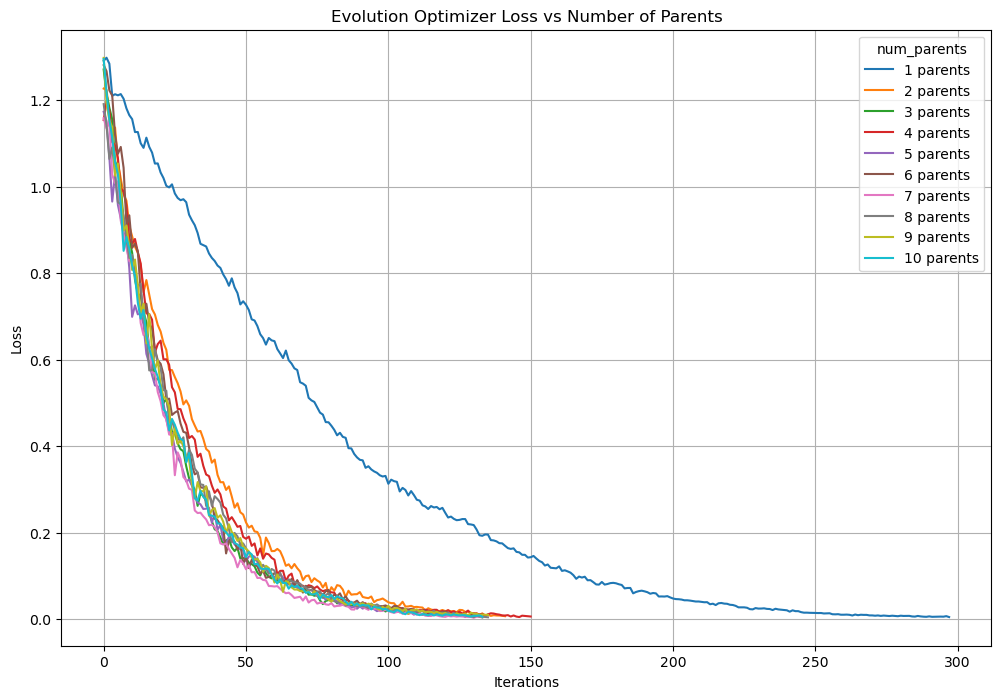

In [5]:

parent_range = range(1, 11)
loss_dict = {}

for num_parents in parent_range:
    print(f"Running for num_parents = {num_parents}")
    
    # Generate new data for fairness (or keep it fixed if you prefer)
    X, y = classification_data(p_dims=200, noise=0.8, n_points=1000)
    
    # Set up model and optimizer
    LR = LogisticRegression()
    opt = mpEvolutionOptimizer(LR)
    opt.set_mutation(0.5)
    opt.set_population_size(100)
    
    # Loss tracking
    losses = []
    start = time.time()
    
    # Optimization loop
    while accuracy(LR, X, y) < 1:
        opt.step(X, y, num_parents=num_parents)

        losses.append(LR.loss(X, y).item())
    
    print(f"  Finished in {len(losses)} iterations, Time: {round(time.time() - start, 2)}s")
    loss_dict[num_parents] = losses

# Plotting
plt.figure(figsize=(12, 8))
for k, losses in loss_dict.items():
    plt.plot(losses, label=f"{k} parents")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer Loss vs Number of Parents")
plt.legend(title="num_parents")
plt.grid(True)
plt.show()


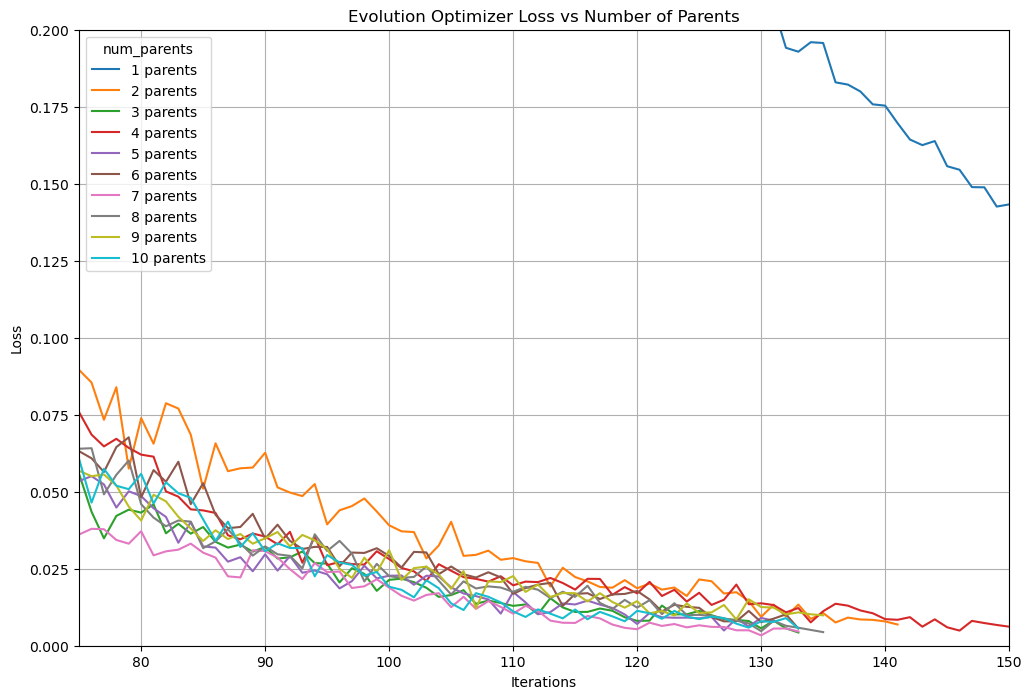

In [6]:
# Plotting
plt.figure(figsize=(12, 8))
for k, losses in loss_dict.items():
    plt.plot(losses, label=f"{k} parents")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer Loss vs Number of Parents")
plt.legend(title="num_parents")
plt.grid(True)
plt.xlim(75, 150)
plt.ylim(0, .2)
plt.show()
